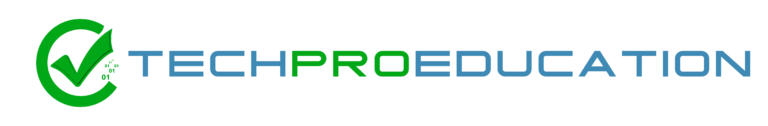

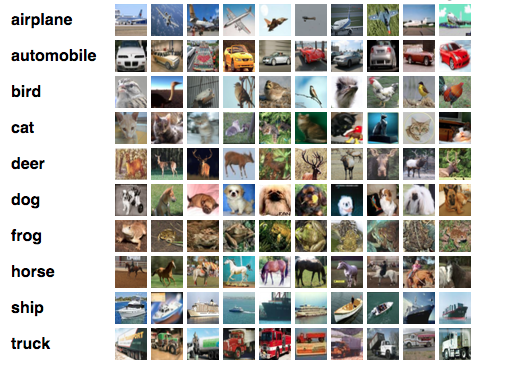

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

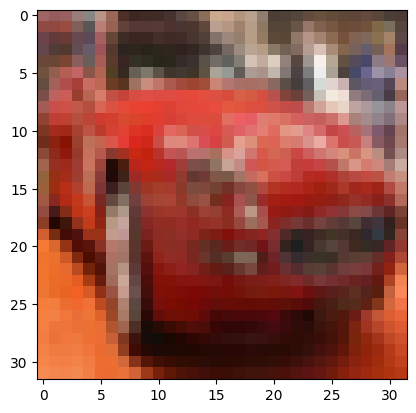

In [7]:
plt.imshow(X_train[5]);

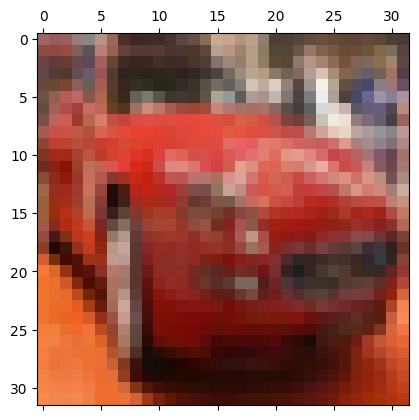

In [8]:
plt.matshow(X_train[5]);

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train  # bunların hepsi birer skala değer, bu şekilde modele verirsek model bunun regresyon problem olduğunu düşünür. 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)   # Array içindeki unique değerleri gösteriyor. 
#return_counts= True ile bu değerlerin sayılarını da görmüş oluyoruz.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[3]

array([4], dtype=uint8)

In [15]:
classes[int(y_train[3])]   # bunu indeksleyebiliyoruz. 

'deer'

In [16]:
int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.

29428

In [17]:
np.random.randint(low=0, high=50000, size=17) 

array([ 1987,  4404, 45280,  8104, 11682, 13670, 29672, 47137,  8303,
        2895, 41841, 21231,  8126, 15180, 11294,  5460, 25951])

In [18]:
np.random.randint(low=0, high=50000, size=17) 

array([24924, 25403,  8909, 23985, 12336, 24488, 17461, 23220, 24122,
       41034, 19849,   514, 24956, 40034,  9163, 48259, 15068])

In [19]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor. 

array([[[ 38,  39,  41],
        [ 41,  42,  44],
        [ 41,  42,  44],
        ...,
        [ 62,  73,  84],
        [100, 111, 119],
        [145, 151, 157]],

       [[ 35,  36,  38],
        [ 33,  34,  36],
        [ 36,  37,  38],
        ...,
        [ 22,  28,  28],
        [ 24,  31,  30],
        [ 29,  32,  39]],

       [[ 42,  43,  45],
        [ 37,  38,  40],
        [ 35,  36,  38],
        ...,
        [ 43,  53,  41],
        [ 40,  50,  38],
        [ 27,  39,  30]],

       ...,

       [[ 48,  47,  53],
        [ 48,  47,  53],
        [ 43,  42,  48],
        ...,
        [ 47,  46,  54],
        [ 44,  43,  51],
        [ 46,  46,  52]],

       [[ 40,  39,  45],
        [ 50,  49,  55],
        [ 53,  52,  57],
        ...,
        [ 50,  49,  60],
        [ 49,  47,  58],
        [ 48,  48,  55]],

       [[ 44,  43,  49],
        [ 51,  50,  56],
        [ 55,  54,  60],
        ...,
        [ 49,  49,  61],
        [ 48,  48,  59],
        [ 47,  47,  55]]

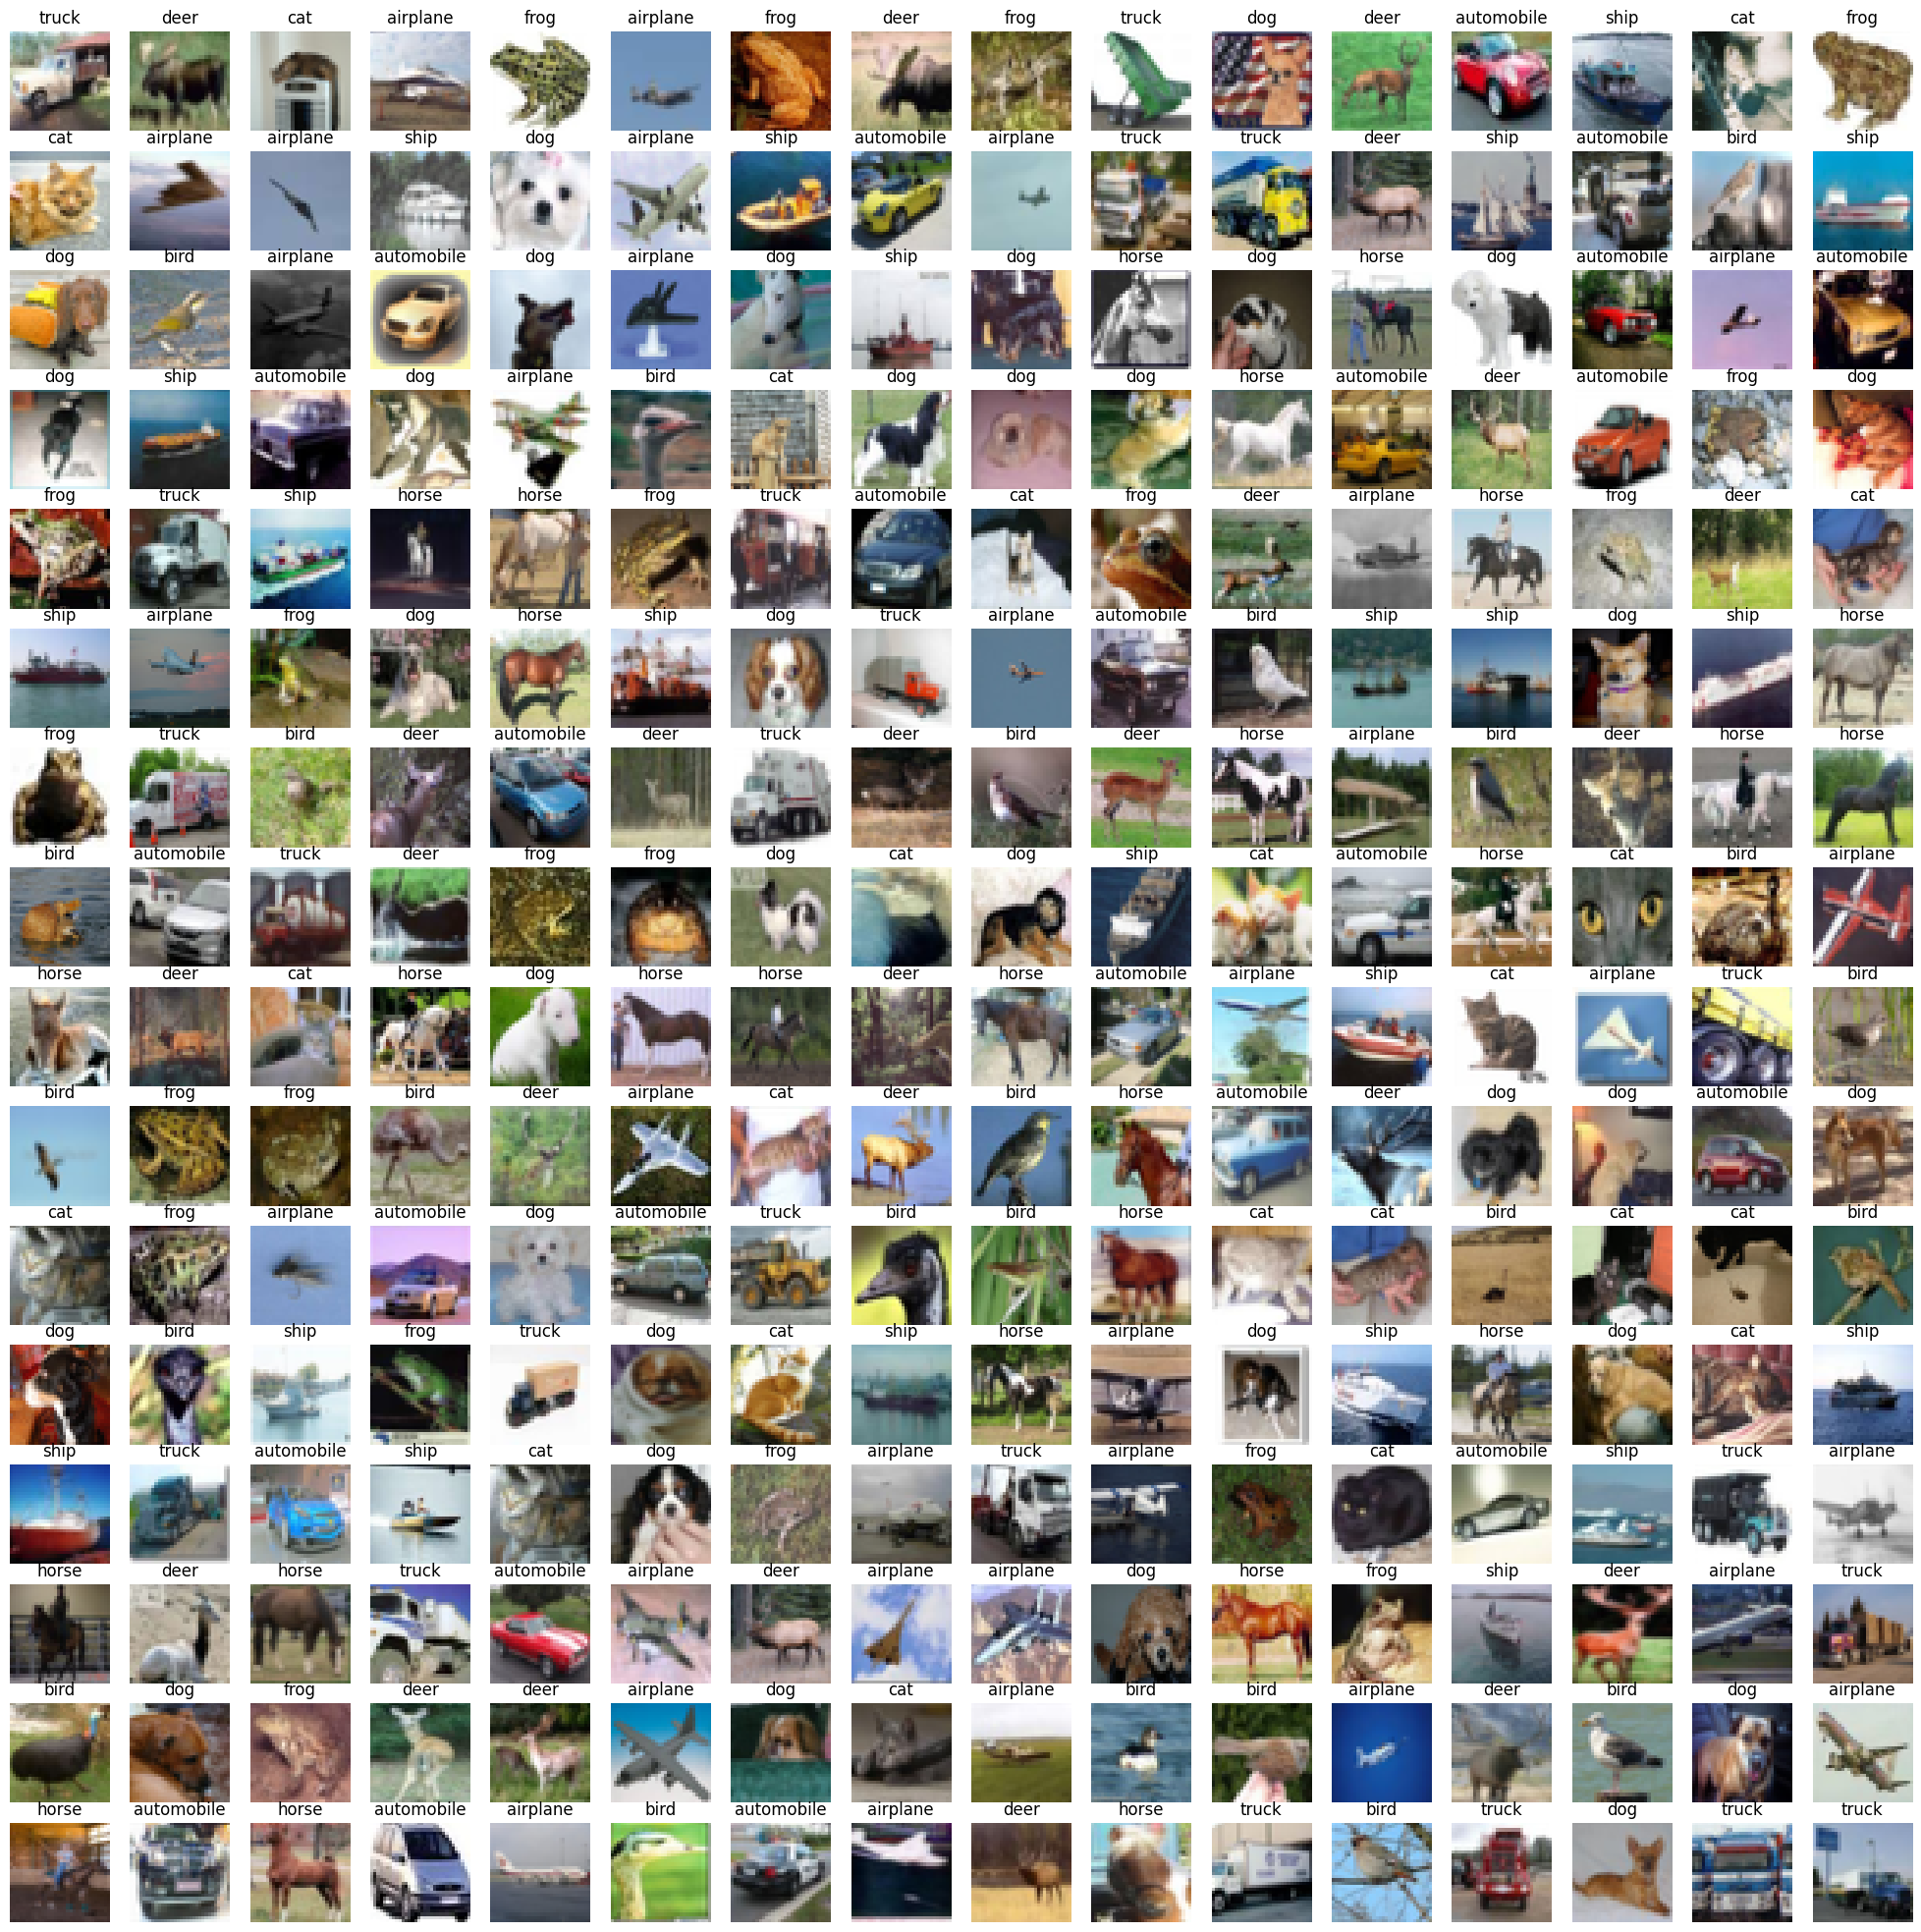

In [20]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [21]:
X_train[5].min()

0

In [22]:
X_train[5].max()

252

In [23]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
X_train[5].min()

0.0

In [25]:
X_train[5].max()

0.9882353

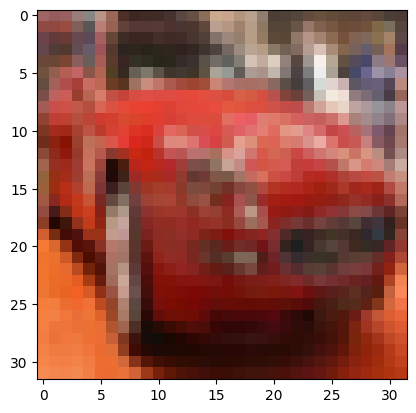

In [26]:
plt.imshow(X_train[5]);

In [27]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

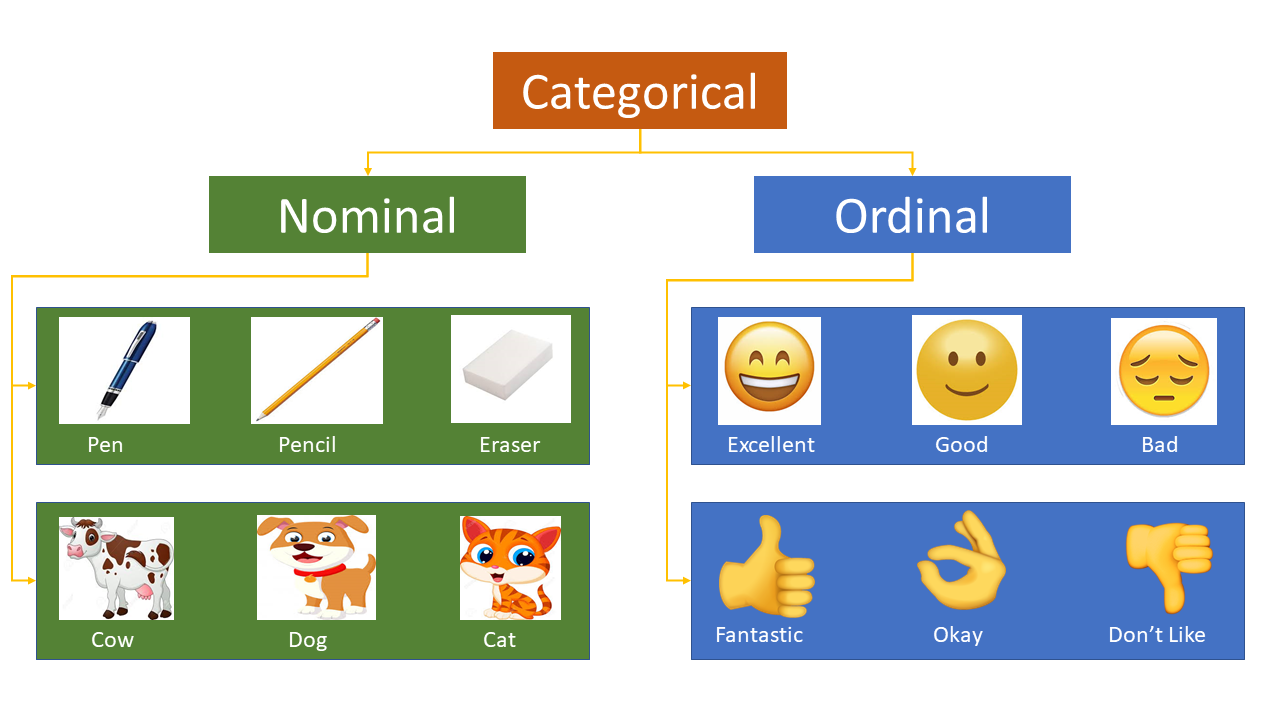

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\nsgr6\.conda\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 32, 32, 32)            │         896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 32, 32, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 16, 16, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_2 (Conv2D)                  │ (None, 16, 16, 32)            │      18,464 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 8, 8, 32)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 2048)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 128)                   │     262,272 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 64)                    │       8,256 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 10)                    │         650 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 309,034 (1.18 MB)

 Trainable params: 309,034 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=25)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.3984 - loss: 1.6407 - val_accuracy: 0.6266 - val_loss: 1.0610
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6551 - loss: 0.9766 - val_accuracy: 0.6996 - val_loss: 0.8735
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.7225 - loss: 0.7892 - val_accuracy: 0.7117 - val_loss: 0.8342
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7672 - loss: 0.6676 - val_accuracy: 0.7259 - val_loss: 0.8145
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7993 - loss: 0.5719 - val_accuracy: 0.7217 - val_loss: 0.8094
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8278 - loss: 0.4899 - val_accuracy: 0.7265 - val_loss: 0.8335
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.8512 - loss: 0.4192 - val_accuracy: 0.7268 - val_loss: 0.8620
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 

In [37]:
model.metrics_names

['loss', 'compile_metrics']

In [38]:
model.history.history

{'accuracy': [0.5017799735069275,
  0.6667400002479553,
  0.725820004940033,
  0.7649000287055969,
  0.7946000099182129,
  0.82014000415802,
  0.8455600142478943,
  0.8689600229263306,
  0.883080005645752,
  0.9003199934959412,
  0.9140400290489197,
  0.9246000051498413,
  0.9317399859428406,
  0.9392799735069275,
  0.9465399980545044,
  0.9501399993896484,
  0.9512199759483337,
  0.9562000036239624,
  0.9576799869537354,
  0.9607399702072144,
  0.9622600078582764,
  0.9633600115776062,
  0.9643999934196472,
  0.9686599969863892,
  0.9654800295829773,
  0.970579981803894,
  0.9698600172996521,
  0.9702399969100952,
  0.9719600081443787,
  0.9719399809837341],
 'loss': [1.3749414682388306,
  0.9419581294059753,
  0.7809538245201111,
  0.6719708442687988,
  0.5871930718421936,
  0.5108930468559265,
  0.43464669585227966,
  0.37124982476234436,
  0.32536500692367554,
  0.2780897617340088,
  0.2394067645072937,
  0.20925386250019073,
  0.19196154177188873,
  0.16988344490528107,
  0.154767

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.50178,1.374941,0.6266,1.060980
1,0.66674,0.941958,0.6996,0.873462
2,0.72582,0.780954,0.7117,0.834202
3,0.76490,0.671971,0.7259,0.814482
4,0.79460,0.587193,0.7217,0.809448


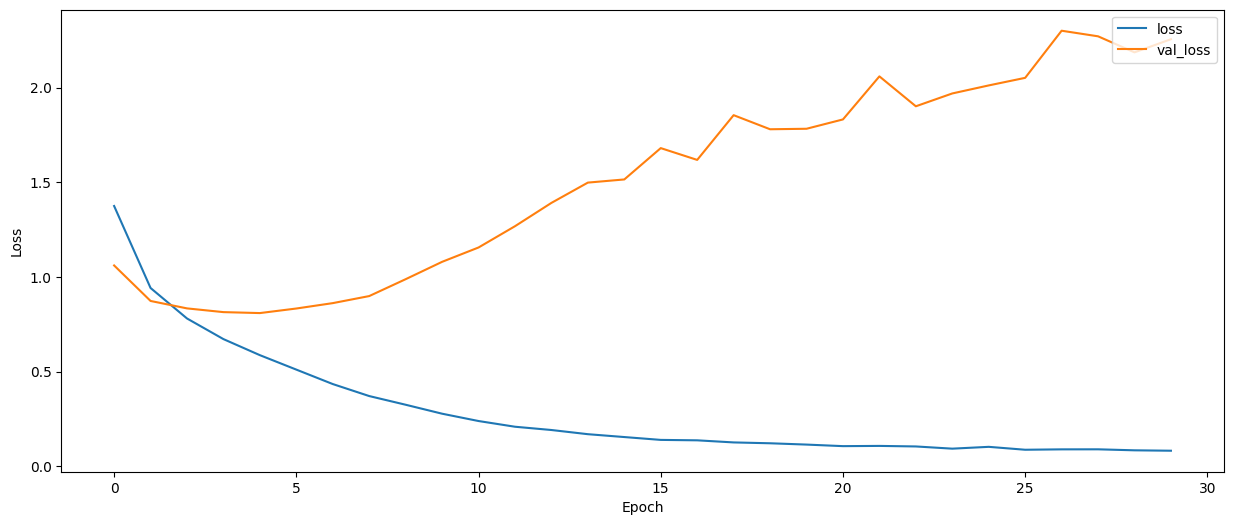

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

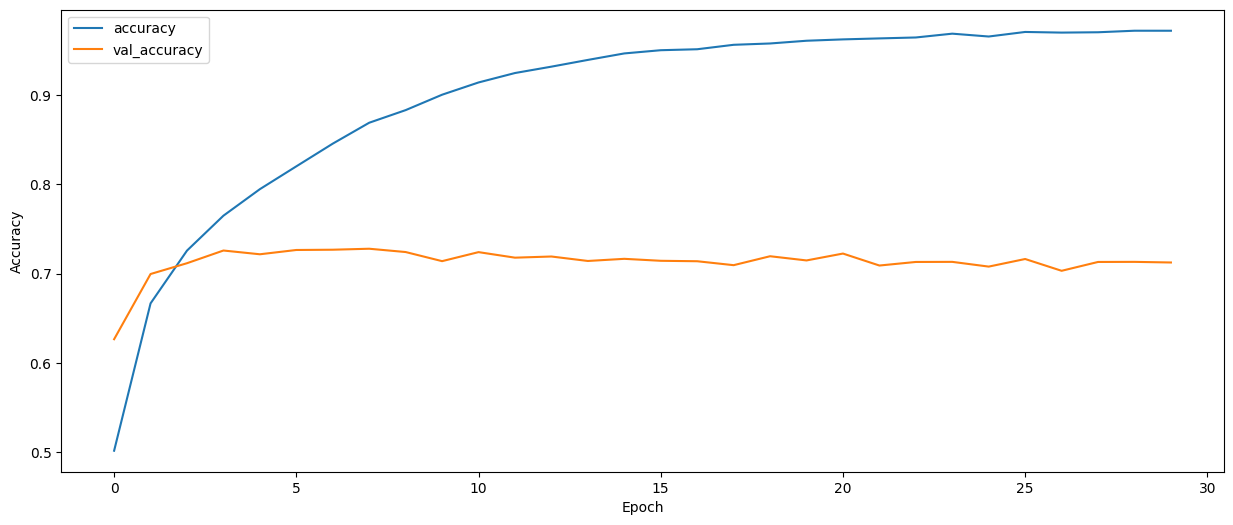

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [42]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7166 - loss: 2.2537
[2.2556040287017822, 0.7124999761581421]


In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you have your y_true and y_pred
# cm = confusion_matrix(y_true, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()


In [49]:
preds = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [50]:
predictions = np.argmax(preds, axis=1)

In [51]:
predictions

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75      1000
           1       0.85      0.82      0.84      1000
           2       0.59      0.64      0.61      1000
           3       0.48      0.54      0.51      1000
           4       0.69      0.57      0.63      1000
           5       0.58      0.63      0.60      1000
           6       0.74      0.80      0.77      1000
           7       0.79      0.75      0.77      1000
           8       0.84      0.85      0.85      1000
           9       0.80      0.82      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [53]:
print(confusion_matrix(y_test, predictions))

[[688  16  90  35  18  15  12  16  72  38]
 [ 11 822   7  16   4   6  10   3  29  92]
 [ 28   5 641  87  62  70  64  26  10   7]
 [ 12  11  78 537  53 187  68  36   9   9]
 [ 10   3  98  87 575  60  82  62  13  10]
 [  5   4  65 184  35 628  28  40   5   6]
 [  2   7  49  74  15  37 800   6   4   6]
 [ 14   4  39  50  52  59  11 754   5  12]
 [ 31  24  19  15  13  13   4   2 855  24]
 [ 24  67   6  24   7   9   3  14  21 825]]


In [54]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2556040287017822
Test accuracy: 0.7124999761581421


In [55]:
my_image = X_test[44]

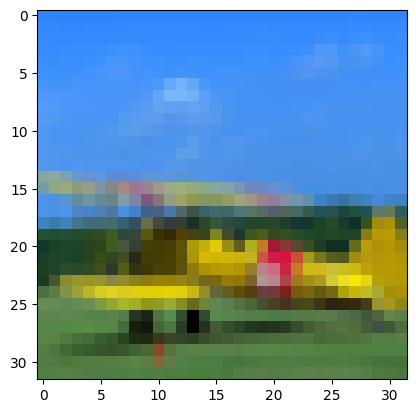

In [56]:
plt.imshow(my_image);

In [57]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [58]:
image_prediction

array([[1.0000000e+00, 3.4569293e-20, 1.4950133e-13, 1.6078210e-31,
        1.9148122e-16, 1.6057595e-26, 6.6388421e-21, 3.7697212e-20,
        2.2820013e-14, 1.4200727e-15]], dtype=float32)

In [59]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [60]:
result=np.argmax(image_prediction, axis=1)

In [61]:
result

array([0], dtype=int64)

In [62]:
classes[int(result)]

'airplane'

In [ ]:
#model.save("cnn-1.h5")

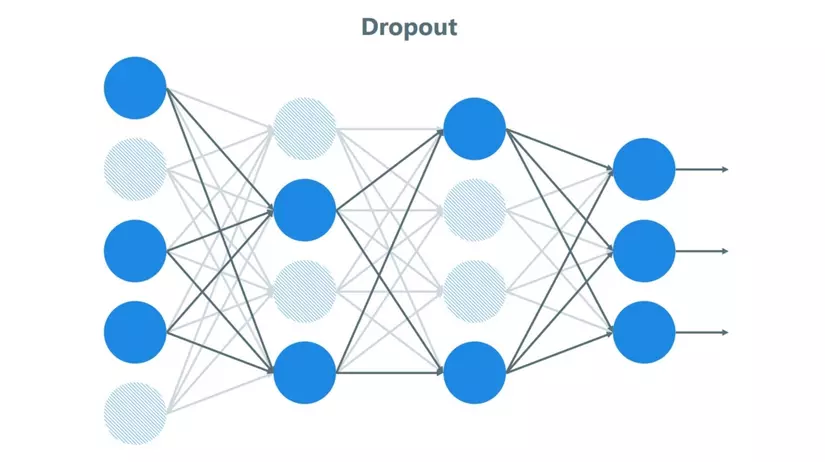

In [63]:
early_stop = EarlyStopping(monitor='val_loss', patience=25)

In [64]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\nsgr6\.conda\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                  │ (None, 32, 32, 32)            │         896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_4 (Conv2D)                  │ (None, 32, 32, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_2 (MaxPooling2D)     │ (None, 16, 16, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 16, 16, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_5 (Conv2D)                  │ (None, 14, 14, 128)           │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_3 (MaxPooling2D)     │ (None, 7, 7, 128)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_1 (Dropout)                │ (None, 7, 7, 128)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_1 (Flatten)                │ (None, 6272)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 256)                   │   1,605,888 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_4 (Dense)                    │ (None, 10)                    │       2,570 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 1,701,706 (6.49 MB)

 Trainable params: 1,701,706 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 58ms/step - accuracy: 0.4027 - loss: 1.6361 - val_accuracy: 0.6542 - val_loss: 0.9944
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.6412 - loss: 1.0104 - val_accuracy: 0.6901 - val_loss: 0.8968
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.7001 - loss: 0.8437 - val_accuracy: 0.7217 - val_loss: 0.8053
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.7366 - loss: 0.7436 - val_accuracy: 0.7463 - val_loss: 0.7444
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.7666 - loss: 0.6675 - val_accuracy: 0.7477 - val_loss: 0.7263
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.7826 - loss: 0.6181 - val_accuracy: 0.7572 - val_loss: 0.7019
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.8019 - loss: 0.5632 - val_accuracy: 0.7528 - val_loss: 0.7076
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy

In [67]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [68]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [69]:
print(classification_report(y_test, predictions))

In [70]:
print(confusion_matrix(y_test, predictions))

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

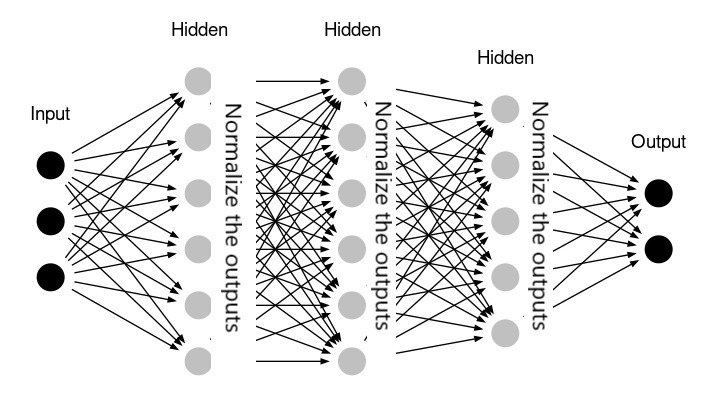

In [72]:
from tensorflow.keras.layers import BatchNormalization

In [73]:
early_stop = EarlyStopping(monitor='val_loss',patience=25)

In [74]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))

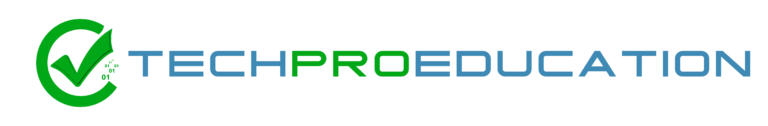